In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [100]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5301 images belonging to 3 classes.


In [101]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2250 images belonging to 3 classes.


In [102]:
cnn = tf.keras.models.Sequential()

In [103]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [104]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [105]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [106]:
cnn.add(tf.keras.layers.Flatten())

In [107]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [108]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [109]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [110]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
166/166 [==============================] - 242s 1s/step - loss: 0.8429 - accuracy: 0.6025 - val_loss: 0.7713 - val_accuracy: 0.6476
Epoch 2/50
166/166 [==============================] - 233s 1s/step - loss: 0.7497 - accuracy: 0.6614 - val_loss: 0.6955 - val_accuracy: 0.6809
Epoch 3/50
166/166 [==============================] - 244s 1s/step - loss: 0.7248 - accuracy: 0.6774 - val_loss: 0.7480 - val_accuracy: 0.6613
Epoch 4/50
166/166 [==============================] - 257s 2s/step - loss: 0.7152 - accuracy: 0.6795 - val_loss: 0.6898 - val_accuracy: 0.6760
Epoch 5/50
166/166 [==============================] - 272s 2s/step - loss: 0.6941 - accuracy: 0.6836 - val_loss: 0.6589 - val_accuracy: 0.7093
Epoch 6/50
166/166 [==============================] - 267s 2s/step - loss: 0.6844 - accuracy: 0.6863 - val_loss: 0.6694 - val_accuracy: 0.7013
Epoch 7/50
166/166 [==============================] - 267s 2s/step - loss: 0.6694 - accuracy: 0.6959 - val_loss: 0.6806 - val_accuracy: 0.6911

In [144]:
import numpy as np
from keras.preprocessing import image
prediction_list=["rain","thunder","wind"]
test_image = image.load_img('dataset/single_prediction/wind5.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
prediction_index = np.argmax(result, axis=1)
prediction = prediction_list[prediction_index[0]]
print(prediction)

1/1 [==============================] - 0s 17ms/step
rain


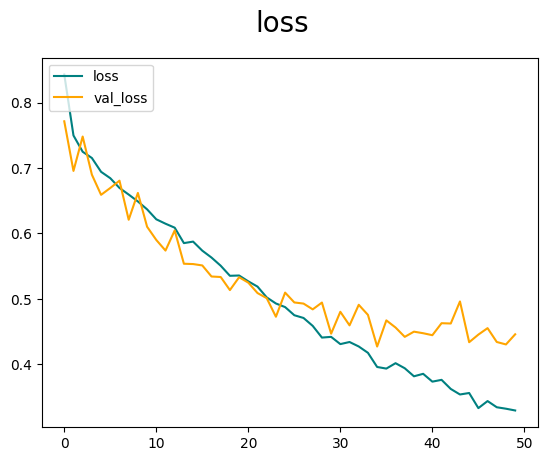

In [111]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

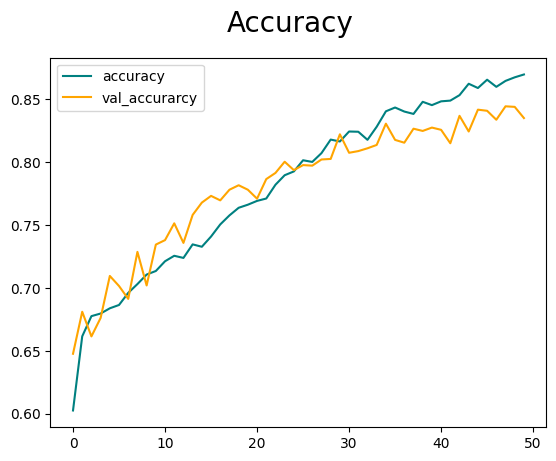

In [112]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accurarcy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [146]:
cnn.save('WeatherDetectionModel.keras')